In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from datasets.xor import XOR
from experiment.runExperiment import RunExperiment
from experiment.models import ModelSetups
from training.train import TrainUtil
from metrics.charts import ChartUtil
from models.enums.chartType import TrainingCharts
import torch
from metrics.accuracy import get_accuracy
from metrics.modelAnalysisUtils import ModelAnalysisUtils
from models.modelAnalysis.multiRunAnalysis import MultiRunAnalysis
from matplotlib import pyplot as plt
import seaborn as sns
from models.enums.similarityType import AbsSimilarityType

In [3]:
dataset = XOR()
in_features = 2
out_features = 2
X_train, y_train, X_val, y_val = dataset.get_dataset(in_features = in_features, unique=False)
trainUtil = TrainUtil(X_train, y_train, X_val = X_val, y_val = y_val)

In [4]:
layers = 2
model_params_norm = {"l1": (200, 10), "l2": (200, 10)}
model_params_norm_second = {"l1": (200, None), "l2": (200, 10)}
model_params_norm_first = {"l1": (200, 10), "l2": (200, None)}
model_params_second = {"l1": (200, 10), "l2": (400, 10)}
model_params_first = {"l1": (400, 10), "l2": (200, 10)}
model_params_all = {"l1": (400, 10), "l2": (400, 10)}
model_params_second_first = {"l1": (200, 10), "l2": (400, None)}
model_params_second_second = {"l1": (200, None), "l2": (400, 10)}
model_params_first_first = {"l1": (400, 10), "l2": (200, None)}
model_params_first_second = {"l1": (400, None), "l2": (200, 10)}
model_params_all_first = {"l1": (400, 10), "l2": (400, None)}
model_params_all_second = {"l1": (400, None), "l2": (400, 10)}

In [5]:
def get_models_to_plot_from_combined(combined_charts):
    sparse_models = [ i  for i in combined_charts.get_models() if "Sparse" in i]
    control_models = [ i for i in combined_charts.get_models() if "Control" in i]
    dense_models = [ i for i in combined_charts.get_models() if "Dense" in i]

    return sparse_models, control_models, dense_models

In [6]:
model_types = {"200x400 Complete Sparse": model_params_second,
               "400x200 Complete Sparse": model_params_first,  
               "400x400 Complete Sparse": model_params_all,  
               "200x200 Complete Sparse": model_params_norm,  
               "200x400 1st L Sparse": model_params_second_first, 
               "200x400 2nd L Sparse": model_params_second_second,
               "400x200 1st L Sparse": model_params_first_first, 
               "400x200 2nd L Sparse": model_params_first_second,
               "400x400 1st L Sparse": model_params_all_first, 
               "400x400 2nd L Sparse": model_params_all_second,
               "200x200 1st L Sparse": model_params_norm_first, 
               "200x200 2nd L Sparse": model_params_norm_second,
            }

In [7]:
experiment = RunExperiment(trainUtil)
modelSetups = ModelSetups()
trainUtil.set_data_granularity(1)

In [145]:
chartUtils_2l = {}
chartUtils_2l["200x400"] = experiment.perform_one_experiment(
    models = 
    {
        "200x400 Control Model": modelSetups._get_control_model,
        "200x400 Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["200x400 Complete Sparse"],
    n_epochs=50,
)

chartUtils_2l["200x200"] = experiment.perform_one_experiment(
    models = 
    {
        "200x200 Control Model": modelSetups._get_control_model,
        "200x200 Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["200x200 Complete Sparse"],
    n_epochs=50,
)

chartUtils_2l["400x200"] = experiment.perform_one_experiment(
    models = 
    {
        "400x200 Control Model": modelSetups._get_control_model,
        "400x200 Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["400x200 Complete Sparse"],
    n_epochs=50,
)

chartUtils_2l["400x400"] = experiment.perform_one_experiment(
    models = 
    {
        "400x400 Control Model": modelSetups._get_control_model,
        "400x400 Dense Model": modelSetups._get_dense_model,
    },
    in_features = in_features, 
    out_features = out_features, 
    layers = layers,  
    model_params = model_types["400x400 Complete Sparse"],
    n_epochs=50,
)

for modelName in model_types:
    chartUtils_2l[modelName] = experiment.perform_one_experiment(
        models = {
            modelName: modelSetups._get_sparse_model,
            },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers, 
        model_params = model_types[modelName],
        n_epochs = 50,
        )

In [146]:
model_keys = list(chartUtils_2l.keys())
combined_charts: ChartUtil = chartUtils_2l[model_keys[0]]

for key in model_keys[1:]:
    combined_charts = combined_charts.combine_charts(chartUtils_2l[key])

sparse_models, control_models, dense_models = get_models_to_plot_from_combined(combined_charts)
combined_charts.set_colors_map()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/3673891936.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/3673891936.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/3673891936.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()


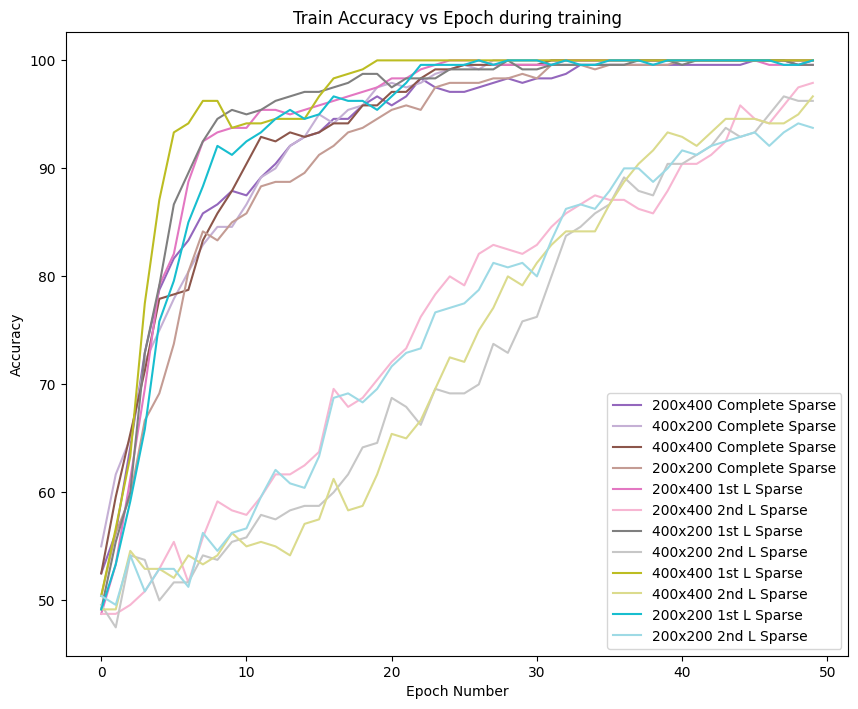

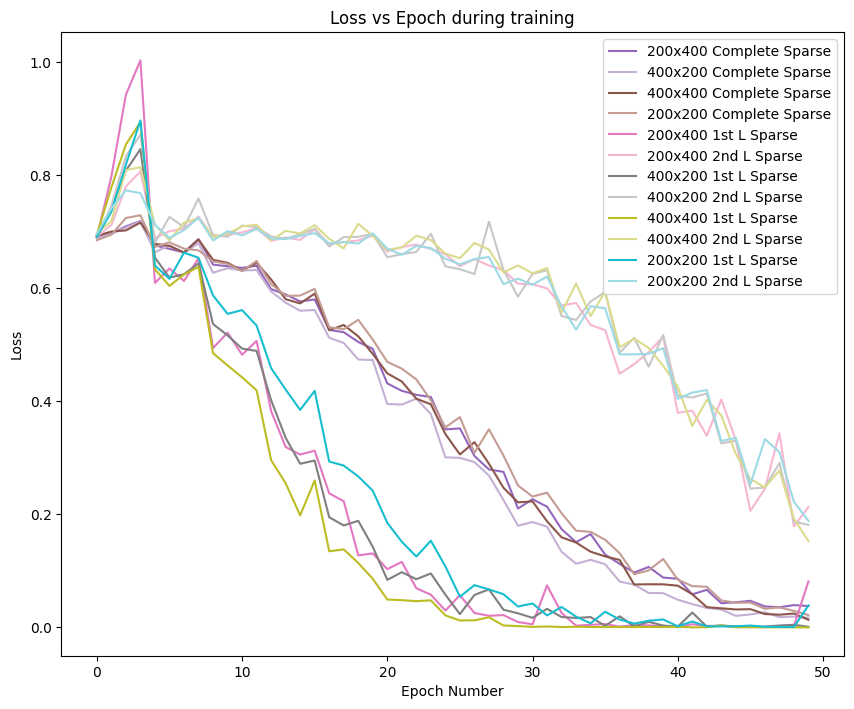

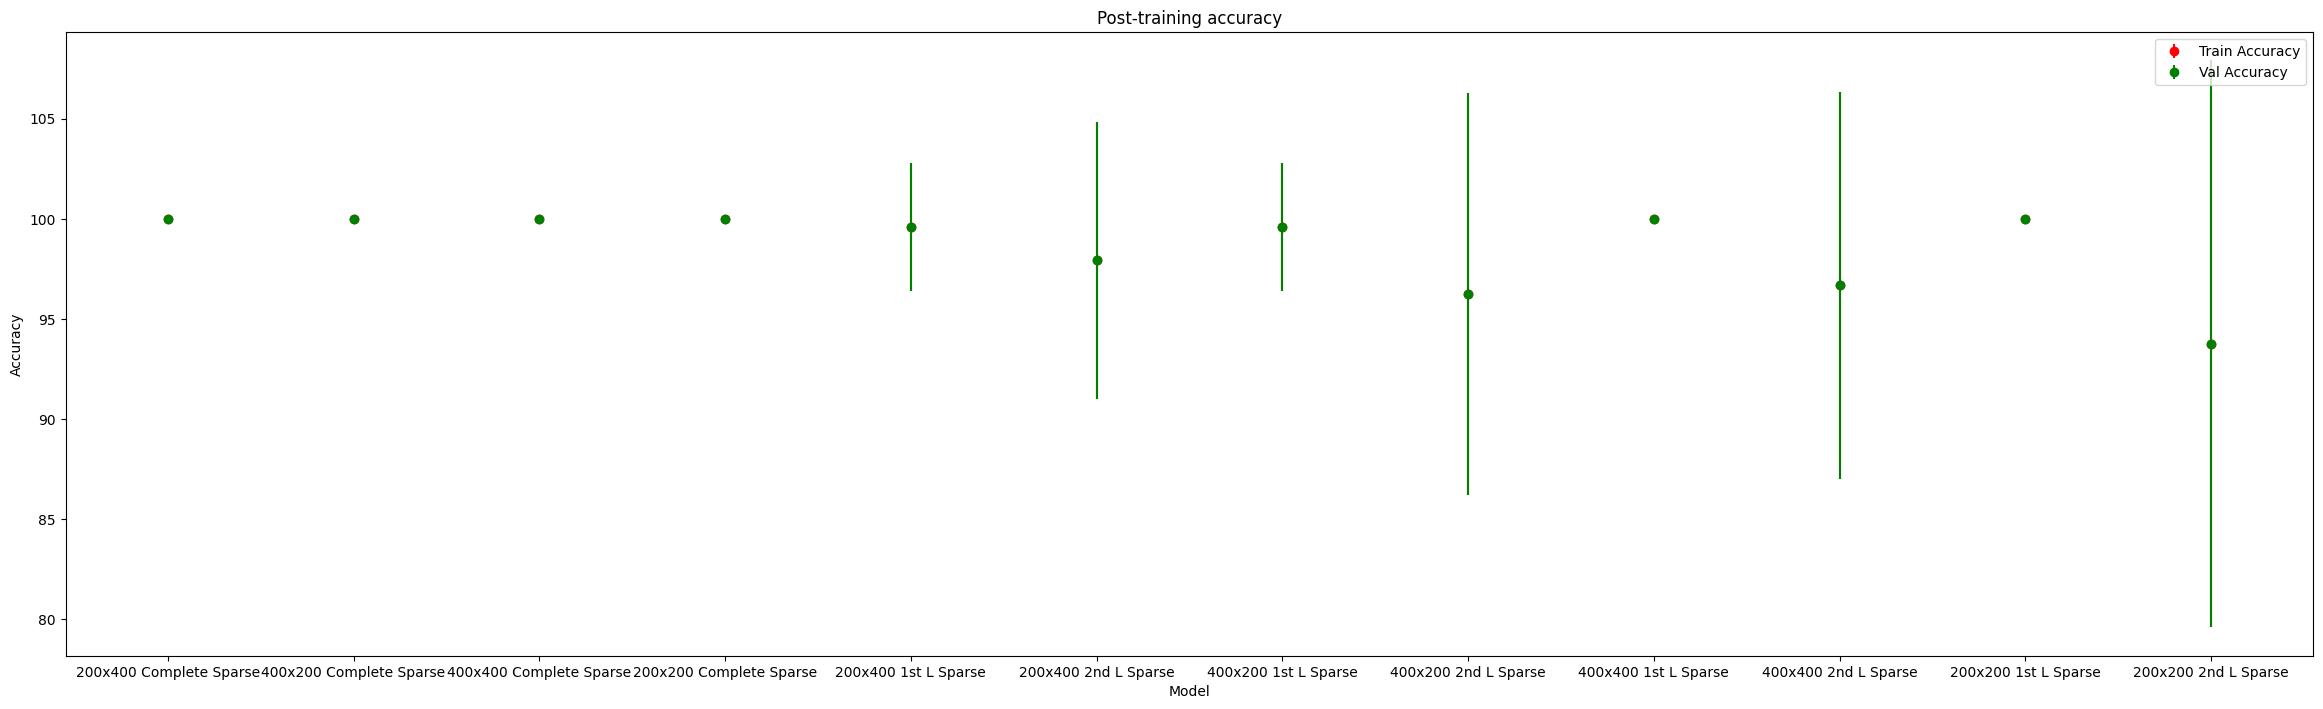

In [ ]:
combined_charts.plot_training_data_for(
    value_to_plot = TrainingCharts.TRAIN_ACC, 
    no_std = True,
    models = sparse_models   
    ).show()
# combined_charts.plot_training_data_for(
#     value_to_plot = TrainingCharts.VAL_ACC, 
#     no_std = True,
#     models = sparse_models   
#     ).show()
combined_charts.plot_training_data_for(
    no_std = True,
    models = sparse_models 
    ).show()
combined_charts.plot_test_accu_for_models(
    width_alpha=3,
    models = sparse_models   
    ).show()

In [8]:
def get_models(modelTypes = model_types):
    sparseResults, trainActivations, testActivations = experiment.train_models(
        models = 
        {
            "Control Model": modelSetups._get_control_model,
            "200x400 Dense Model": modelSetups._get_dense_model,
        },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers,  
        model_params = model_types["200x400 Complete Sparse"],
        n_epochs=100,
    )

    newSparseResults, newTrainActivations, newTestActivations = experiment.train_models(
        models = 
        {
            # "400x200 Control Model": modelSetups._get_control_model,
            "400x200 Dense Model": modelSetups._get_dense_model,
        },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers,  
        model_params = model_types["400x200 Complete Sparse"],
        n_epochs=100,
    )
    sparseResults = sparseResults | newSparseResults
    trainActivations = trainActivations | newTrainActivations
    testActivations = testActivations | newTestActivations

    newSparseResults, newTrainActivations, newTestActivations = experiment.train_models(
        models = 
        {
            # "200x200 Control Model": modelSetups._get_control_model,
            "200x200 Dense Model": modelSetups._get_dense_model,
        },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers,  
        model_params = model_types["200x200 Complete Sparse"],
        n_epochs=100,
    )
    sparseResults = sparseResults | newSparseResults
    trainActivations = trainActivations | newTrainActivations
    testActivations = testActivations | newTestActivations

    newSparseResults, newTrainActivations, newTestActivations = experiment.train_models(
        models = 
        {
            # "400x400 Control Model": modelSetups._get_control_model,
            "400x400 Dense Model": modelSetups._get_dense_model,
        },
        in_features = in_features, 
        out_features = out_features, 
        layers = layers,  
        model_params = model_types["400x400 Complete Sparse"],
        n_epochs=100,
    )
    sparseResults = sparseResults | newSparseResults
    trainActivations = trainActivations | newTrainActivations
    testActivations = testActivations | newTestActivations

    for modelName in model_types:
        newSparseResults, newTrainActivations, newTestActivations = experiment.train_models(
            models = {
                modelName: modelSetups._get_sparse_model,
                },
            in_features = in_features, 
            out_features = out_features, 
            layers = layers, 
            model_params = model_types[modelName],
            n_epochs = 100,
            )
        sparseResults = sparseResults | newSparseResults
        trainActivations = trainActivations | newTrainActivations
        testActivations = testActivations | newTestActivations
    return sparseResults, trainActivations, testActivations

In [ ]:
multi_run_analysis = MultiRunAnalysis()
modelAnalysisUtils = ModelAnalysisUtils()

In [ ]:
sparseResults, trainActivations, testActivations = get_models()
testActivations = {}
with torch.no_grad():
    for modelName, model in sparseResults.items():
        op, testActivations[modelName] = model.forward(X_val, return_acts = True)
        accuracy = get_accuracy(model, X_val, y_val)
        if accuracy != 1.:
            print(modelName, accuracy)
multi_run_analysis.add_run_data(testActivations)

Control Model 0.75


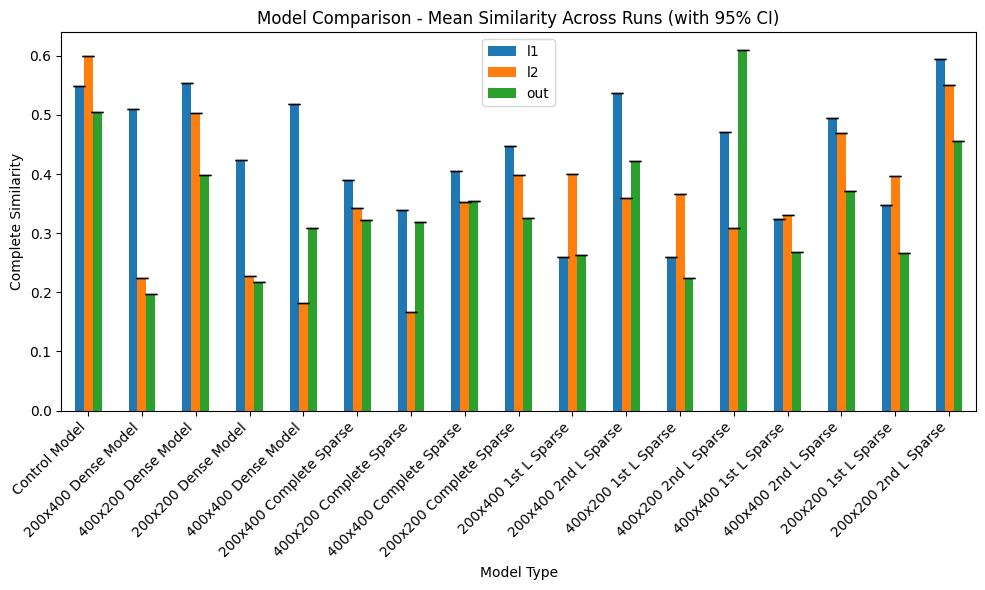

In [ ]:
df_mean, df_ci = modelAnalysisUtils.create_similarity_complete_df_multi_run(multi_run_analysis)
# df_mean, df_ci = create_int_sep_df_multi_run(multi_run_analysis, needIntegration=True)

ax = df_mean.plot(kind='bar', yerr=df_ci, capsize=4, figsize=(10, 6))

plt.title("Model Comparison - Mean Similarity Across Runs (with 95% CI)")
plt.ylabel("Complete Similarity")
plt.xlabel("Model Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_73208/4283508353.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


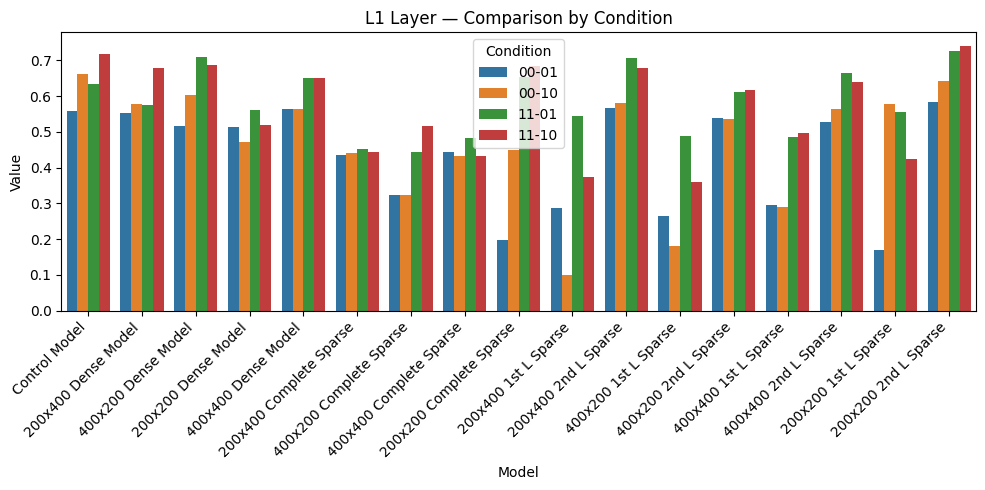

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_73208/4283508353.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


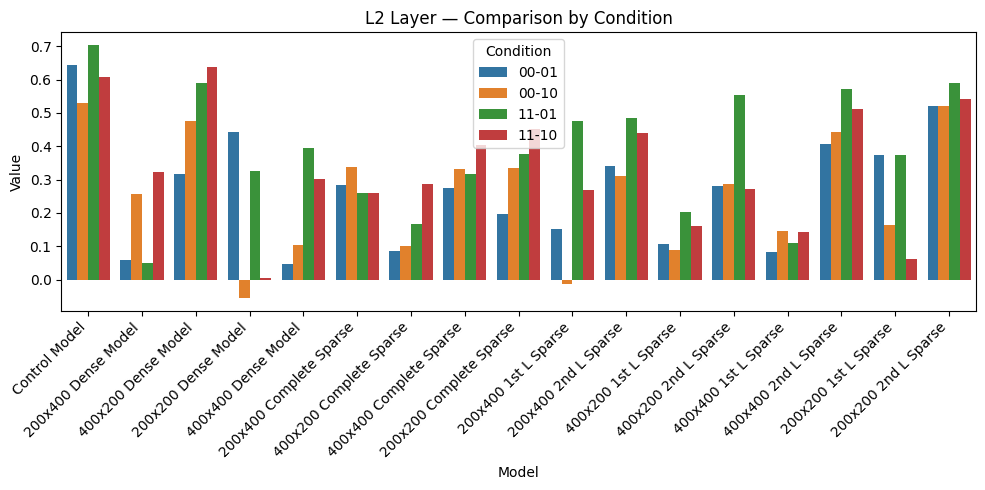

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_73208/4283508353.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


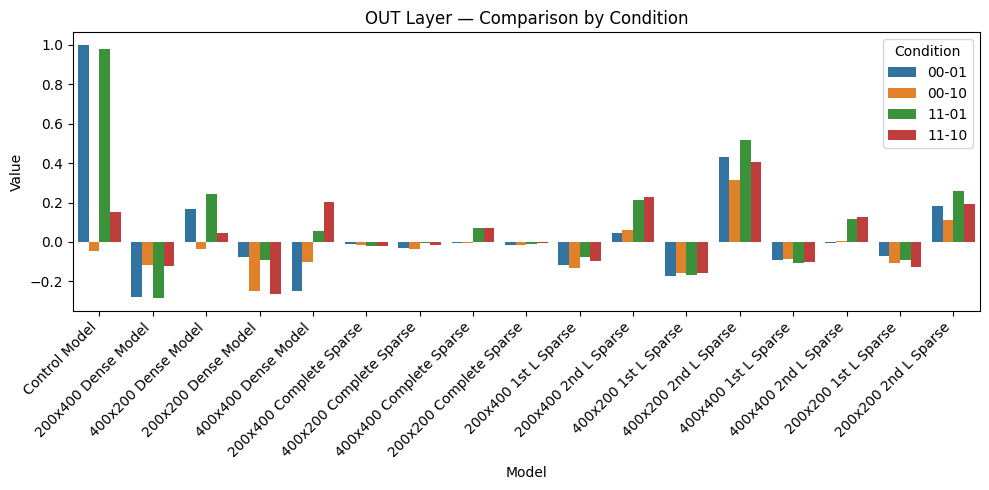

In [ ]:
df = modelAnalysisUtils.create_absolute_sim_graph(multi_run_analysis, AbsSimilarityType.BETWEEN)

layers = ["l1", "l2", "out"]

for layer in layers:
    plt.figure(figsize=(10, 5))
    subset = df[df["Layer"] == layer]
    sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)
    plt.title(f"{layer.upper()} Layer — Comparison by Condition")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
multi_run_analysis = MultiRunAnalysis()

In [ ]:
n_runs = 50
layers = 2
for _ in range(n_runs):
    sparseResults, trainActivations, testActivations = get_models()
    sparseActivations = {}
    with torch.no_grad():
        for modelName, model in sparseResults.items():
            op, sparseActivations[modelName] = model.forward(X_val, return_acts = True)
            accuracy = get_accuracy(model, X_val, y_val)
            if accuracy != 1.:
                print(modelName, accuracy)
    multi_run_analysis.add_run_data(sparseActivations)

Control Model 0.75


In [266]:
from models.enums.similarityType import AbsSimilarityType


for model_name, model_analysis in multi_run_analysis.models.items():
    for layer_name, layer_analysis in model_analysis.layers.items():
        # Get mean complete similarity across all runs
        complete_similarities = layer_analysis.get_absolute_similarity_values(AbsSimilarityType.BETWEEN)
        print(len(complete_similarities))
        break
    break

2


/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/1018712482.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


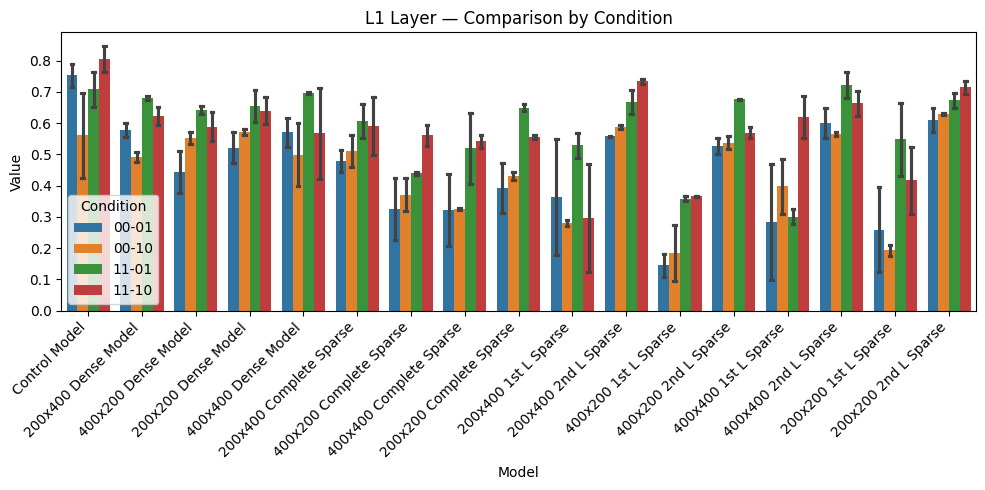

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/1018712482.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


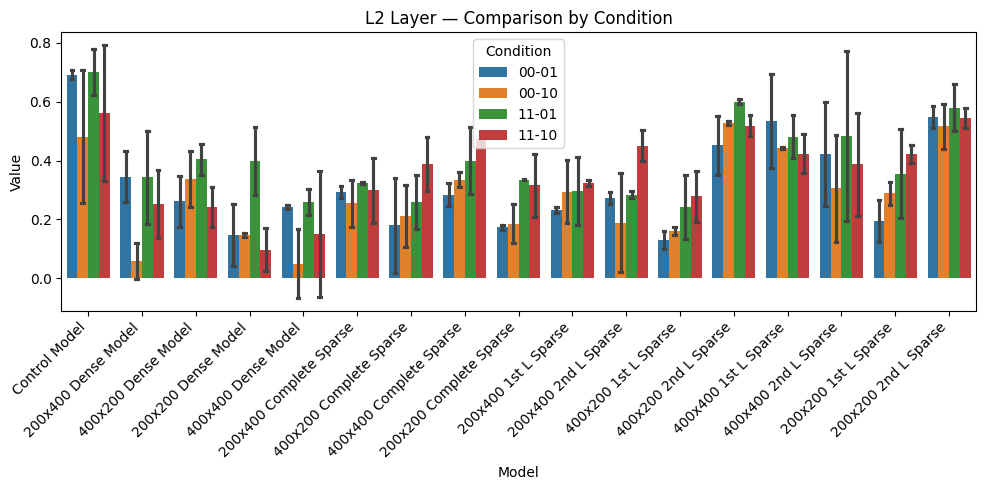

/var/folders/m0/_vdtl5rj0lq8yyddkcqqj6wm0000gn/T/ipykernel_53928/1018712482.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)


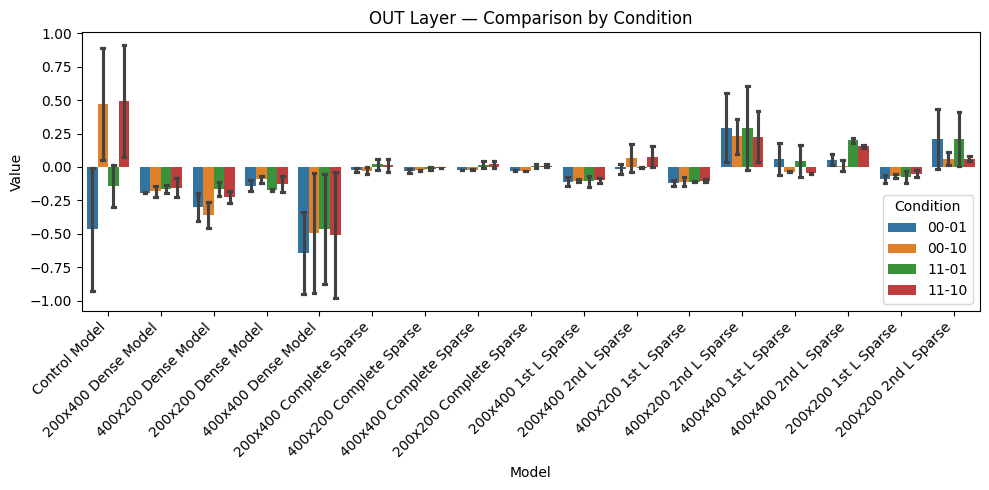

In [ ]:
df = modelAnalysisUtils.create_absolute_sim_graph(multi_run_analysis, AbsSimilarityType.BETWEEN)

layers = ["l1", "l2", "out"]

for layer in layers:
    plt.figure(figsize=(10, 5))
    subset = df[df["Layer"] == layer]
    sns.barplot(data=subset, x="Model", y="Value", hue="Condition", ci=95, capsize=0.2)
    plt.title(f"{layer.upper()} Layer — Comparison by Condition")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

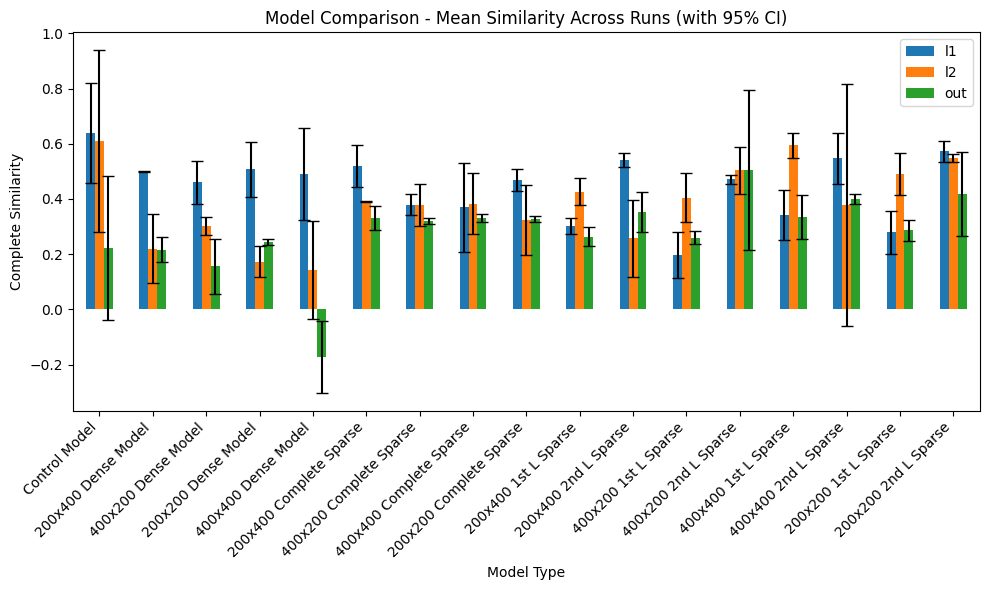

In [ ]:
df_mean, df_ci = modelAnalysisUtils.create_similarity_complete_df_multi_run(multi_run_analysis)
# df_mean, df_ci = create_int_sep_df_multi_run(multi_run_analysis, needIntegration=True)

ax = df_mean.plot(kind='bar', yerr=df_ci, capsize=4, figsize=(10, 6))

plt.title("Model Comparison - Mean Similarity Across Runs (with 95% CI)")
plt.ylabel("Complete Similarity")
plt.xlabel("Model Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()